In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

np.random.seed(5)

In [2]:
# 按照等差数列的方法，生成100个点
x_data = np.linspace(-1, 1, 100)

# y=2x+1+噪声，纬度需要一致
y_data = 2 * x_data + 1.0 + np.random.randn(*x_data.shape) * 0.4

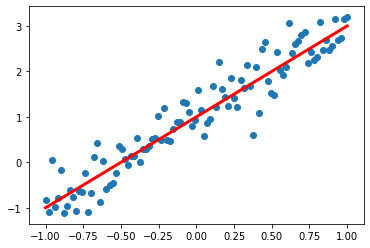

In [3]:
plt.scatter(x_data, y_data)

plt.plot(x_data, 2*x_data + 1.0, color = 'red', linewidth = 3)

构建模型

In [4]:
x = tf.placeholder("float", name="x")
y = tf.placeholder("float", name="y")

def model(x, w, b):
    return tf.multiply(x, w) + b

定义模型结构

In [5]:
w = tf.Variable(1.0, name="w0")
b = tf.Variable(0.0, name="b0")

pred = model(x, w, b)

训练模型

In [7]:
#traing
train_epochs = 10
learning_rate = 0.05

定义损失函数

In [8]:
#L2  均方差

loss_fuction = tf.reduce_mean(tf.square(y-pred))

定义优化器

In [9]:
#梯度下降
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_fuction)

创建会话

In [10]:
sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

迭代训练

w:  1.9822965
b:  1.0420128


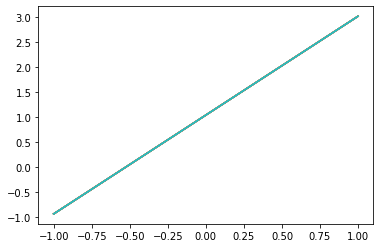

In [14]:
for epoch in range(train_epochs):
    for xs,ys in zip(x_data, y_data):
        _, loss = sess.run([optimizer, loss_fuction], \
                           feed_dict={x:xs, y:ys})
    b0temp=b.eval(session=sess)
    w0temp=w.eval(session=sess)
    plt.plot(x_data, w0temp * x_data + b0temp)
print("w: ",sess.run(w))
print("b: ",sess.run(b))

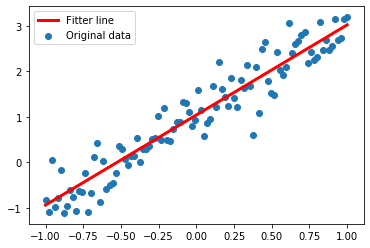

In [20]:
plt.scatter(x_data, y_data, label='Original data')
plt.plot(x_data, x_data * sess.run(w) + sess.run(b),\
        label='Fitter line', color = 'r',linewidth = 3)
plt.legend(loc=2)

 模型预测

In [21]:
x_test = 3.21
predict = sess.run(pred, feed_dict={x: x_test})
print("预测值: %f" % predict)

target = 2 * x_test + 1.0
print("目标值: %f" % target)

预测值: 7.405184
目标值: 7.420000


# 在训练中显示损失值

显示损失值

Train Epoch: 01 Step: 010 loss 0.034476232
Train Epoch: 01 Step: 020 loss 0.084932953
Train Epoch: 01 Step: 030 loss 0.000432179
Train Epoch: 01 Step: 040 loss 0.327603668
Train Epoch: 01 Step: 050 loss 0.027157897
Train Epoch: 01 Step: 060 loss 0.010007779
Train Epoch: 01 Step: 070 loss 0.128093019
Train Epoch: 01 Step: 080 loss 0.000972291
Train Epoch: 01 Step: 090 loss 0.102466956
Train Epoch: 01 Step: 100 loss 0.048542053
Train Epoch: 02 Step: 110 loss 0.036608703
Train Epoch: 02 Step: 120 loss 0.084071681
Train Epoch: 02 Step: 130 loss 0.000471986
Train Epoch: 02 Step: 140 loss 0.326537669
Train Epoch: 02 Step: 150 loss 0.027489651
Train Epoch: 02 Step: 160 loss 0.010214431
Train Epoch: 02 Step: 170 loss 0.127409413
Train Epoch: 02 Step: 180 loss 0.001022662
Train Epoch: 02 Step: 190 loss 0.102852270
Train Epoch: 02 Step: 200 loss 0.048354391
Train Epoch: 03 Step: 210 loss 0.036252663
Train Epoch: 03 Step: 220 loss 0.084142074
Train Epoch: 03 Step: 230 loss 0.000472851
Train Epoch

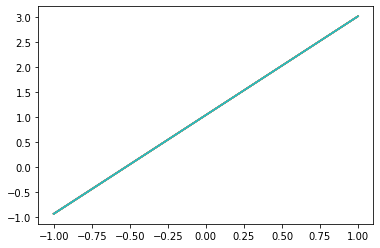

In [24]:
step = 0
loss_list = []

for epoch in range(train_epochs):
    for xs,ys in zip(x_data, y_data):
        _, loss = sess.run([optimizer, loss_fuction], \
                           feed_dict={x:xs, y:ys})
        # 显示损失值 loss
        # display_step 控制报告的粒度
        display_step = 10
        loss_list.append(loss)
        step=step+1
        if step %display_step == 0:
            print("Train Epoch:",'%02d' % (epoch+1),\
                  "Step: %03d"%(step),"loss",\
                 "{:.9f}".format(loss))
    b0temp=b.eval(session=sess)
    w0temp=w.eval(session=sess)
    plt.plot(x_data,w0temp * x_data + b0temp)

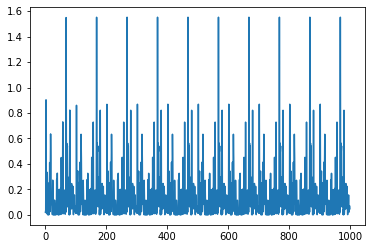

In [26]:
plt.plot(loss_list)

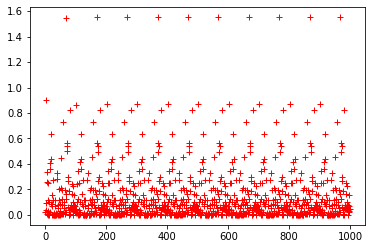

In [27]:
plt.plot(loss_list,'r+')